# Intro to Univariate Volatility Forecasting with Arch

## Library Imports

In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf 
from arch import arch_model
from arch.univariate import ARX, GARCH, StudentsT
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Importing S&P 500 Data from 10 years back

In [2]:
sp_500 = yf.download("^GSPC", period="10y", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [13]:
sp_500_close = sp_500.Close
sp_500_close

Date
2014-09-09    1988.439941
2014-09-10    1995.689941
2014-09-11    1997.449951
2014-09-12    1985.540039
2014-09-15    1984.130005
                 ...     
2024-09-03    5528.930176
2024-09-04    5520.069824
2024-09-05    5503.410156
2024-09-06    5408.419922
2024-09-09    5454.140137
Name: Close, Length: 2517, dtype: float64

<Axes: xlabel='Date'>

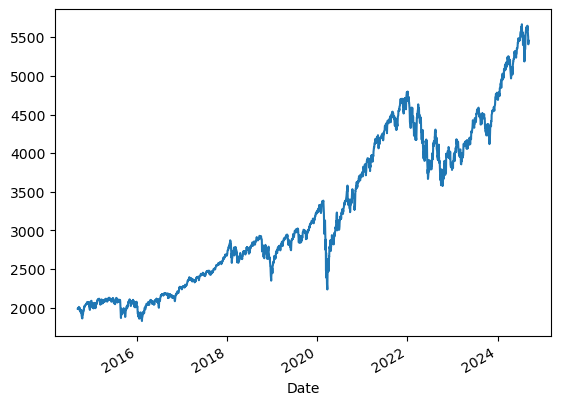

In [14]:
sp_500_close.plot.line()

## Calculate the log return

$ log\;return = ln(\frac{X_t}{X_{t-1}})$

In [15]:
sp_500_close_log_return = np.log(sp_500_close / sp_500_close.shift(1))

In [21]:
sp_500_close_log_return = sp_500_close_log_return.dropna()

<Axes: xlabel='Date'>

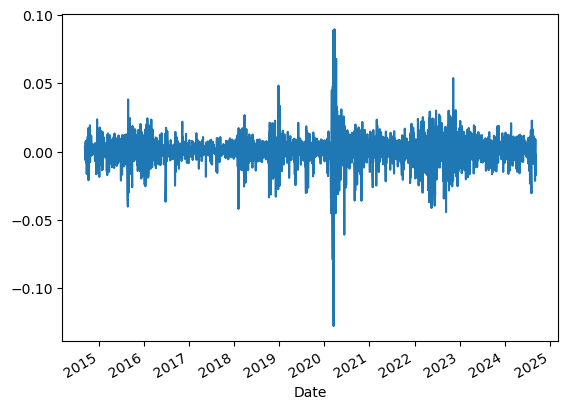

In [22]:
sp_500_close_log_return.plot.line()

## Default GARCH(1,1) Model With Constant Mean

mean model:  
$r_t = \mu + \epsilon_t$  
volatility model:  
$\sigma^{2}_{t} = \omega + \alpha\epsilon^{2}_{t-1} + \beta\sigma^{2}_{t-1}$  
$\epsilon_{t} = \sigma_{t}\epsilon_{t}, \; e_{t} \sim N(0,1)$

In [27]:
am = arch_model(sp_500_close_log_return)
res = am.fit(update_freq=5)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -8349.450722712376
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 3


e:\Programs\miniforge3\envs\quant_paper_replication\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001274. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [28]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                8349.45
Distribution:                  Normal   AIC:                          -16690.9
Method:            Maximum Likelihood   BIC:                          -16667.6
                                        No. Observations:                 2516
Date:                Mon, Sep 09 2024   Df Residuals:                     2515
Time:                        21:04:57   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.2888e-04  3.456e-06    239.859      0.000 [8.221e-04,8.357e-04]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.5472e-06  1.303e-11  1.954e+05      0.000 [2.547e-06,2.547e-06]
alpha[1]       0.2000  2.969e-02      6.736  1.628e-11     [  0.142,  0.258]
beta[1]        0.7800  2.481e-02     31.435 6.827e-217     [  0.731,  0.829]
============================================================================

Covariance estimator: robust
"""

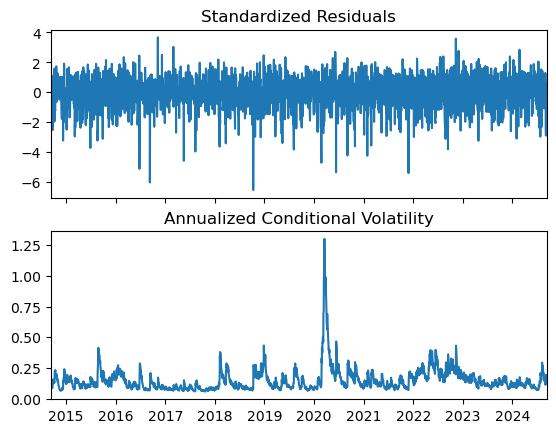

In [34]:
fig = res.plot(annualize="D")

## Garch Model with Autoregressive Mean and T-distributed Residuals

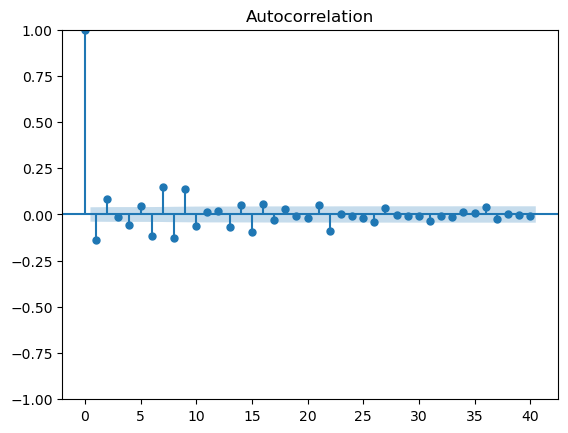

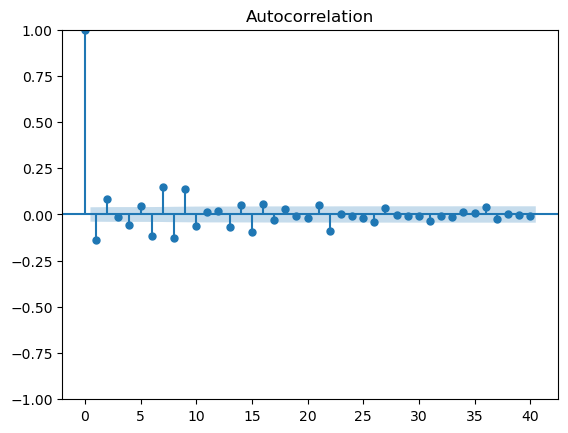

In [32]:
plot_acf(sp_500_close_log_return, lags=40)

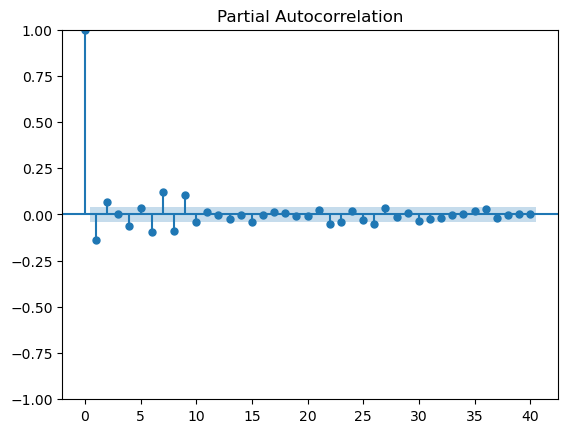

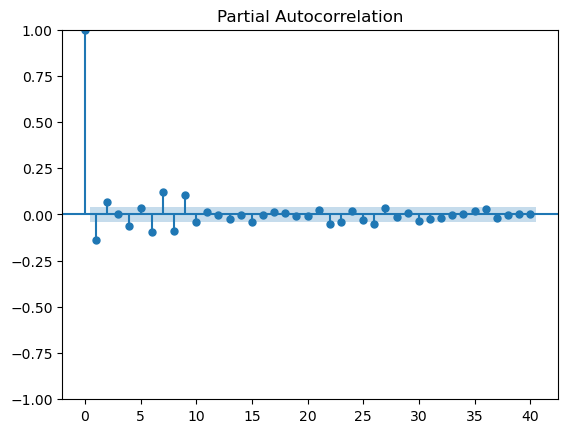

In [33]:
plot_pacf(sp_500_close_log_return, lags=40)

In [39]:
ar = ARX(sp_500_close_log_return, lags=[1])
ar.fit()

                     AR - Constant Variance Model Results                     
Dep. Variable:                  Close   R-squared:                       0.018
Mean Model:                        AR   Adj. R-squared:                  0.018
Vol Model:          Constant Variance   Log-Likelihood:                7732.11
Distribution:                  Normal   AIC:                          -15458.2
Method:            Maximum Likelihood   BIC:                          -15440.7
                                        No. Observations:                 2515
Date:                Tue, Sep 10 2024   Df Residuals:                     2513
Time:                        01:06:16   Df Model:                            2
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const      4.5366e-04  2.262e-04      2.006  4.489e-02 [1.

In [44]:
ar.volatility = GARCH(p=1, o=1, q=1)
ar.distribution = StudentsT()
res = ar.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 161903.9077263772
Iteration:      2,   Func. Count:     27,   Neg. LLF: 22370.996580903055
Iteration:      3,   Func. Count:     36,   Neg. LLF: 22779.694193644136
Iteration:      4,   Func. Count:     45,   Neg. LLF: 718552.9411485553
Iteration:      5,   Func. Count:     55,   Neg. LLF: 83400.03744756302
Iteration:      6,   Func. Count:     65,   Neg. LLF: 105035.34821532223
Iteration:      7,   Func. Count:     74,   Neg. LLF: 8245.538407760114
Iteration:      8,   Func. Count:     82,   Neg. LLF: 17757.92538904979
Iteration:      9,   Func. Count:     92,   Neg. LLF: 108736.90299190037
Iteration:     10,   Func. Count:    102,   Neg. LLF: 5838.870036477941
Iteration:     11,   Func. Count:    110,   Neg. LLF: 383229.92063864553
Iteration:     12,   Func. Count:    123,   Neg. LLF: 5925.076925811339
Iteration:     13,   Func. Count:    132,   Neg. LLF: 4988.548892506902
Iteration:     14,   Func. Count:    140,   Neg. LLF: 4643.

e:\Programs\miniforge3\envs\quant_paper_replication\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001251. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [45]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AR - GJR-GARCH Model Results                            
====================================================================================
Dep. Variable:                        Close   R-squared:                    -406.347
Mean Model:                              AR   Adj. R-squared:               -406.510
Vol Model:                        GJR-GARCH   Log-Likelihood:               -1525.06
Distribution:      Standardized Student's t   AIC:                           3064.11
Method:                  Maximum Likelihood   BIC:                           3104.92
                                              No. Observations:                 2515
Date:                      Tue, Sep 10 2024   Df Residuals:                     2513
Time:                              01:09:15   Df Model:                            2
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          0.1464  8.961e-03     16.335  5.529e-60 [  0.129,  0.164]
Close[1]     -16.0560      2.233     -7.189  6.525e-13 [-20.433,-11.679]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      8.8567e-04  5.848e-05     15.145  8.126e-52 [7.711e-04,1.000e-03]
alpha[1]       0.9003      0.283      3.179  1.479e-03     [  0.345,  1.455]
gamma[1]      -0.7690      0.294     -2.613  8.982e-03     [ -1.346, -0.192]
beta[1]        0.4150  3.784e-02     10.968  5.466e-28     [  0.341,  0.489]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu            18.6863      2.076      9.001  2.234e-19 [ 14.617, 22.755]
========================================================================

Covariance estimator: robust
"""

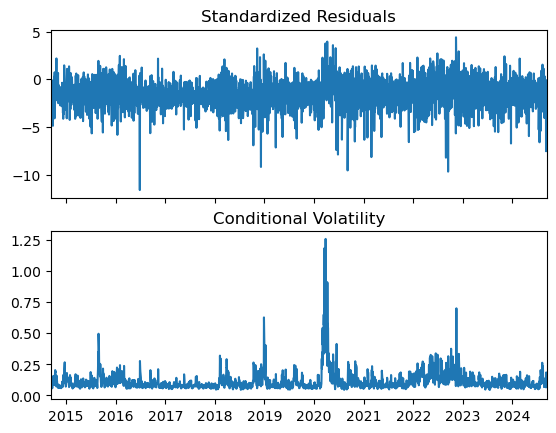

In [46]:
fig = res.plot()

In [48]:
res

                            AR - GJR-GARCH Model Results                            
Dep. Variable:                        Close   R-squared:                    -406.347
Mean Model:                              AR   Adj. R-squared:               -406.510
Vol Model:                        GJR-GARCH   Log-Likelihood:               -1525.06
Distribution:      Standardized Student's t   AIC:                           3064.11
Method:                  Maximum Likelihood   BIC:                           3104.92
                                              No. Observations:                 2515
Date:                      Tue, Sep 10 2024   Df Residuals:                     2513
Time:                              01:09:15   Df Model:                            2
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const          0